In [15]:
def turun(x, a, b):
    return max(min((b - x) / (b - a), 1), 0)

def naik(x, a, b):
    return max(min((x - a) / (b - a), 1), 0)

def tetap(x, a, b, c):
    return max(min((x - a) / (b - a), 1, (c - x) / (c - b)), 0)

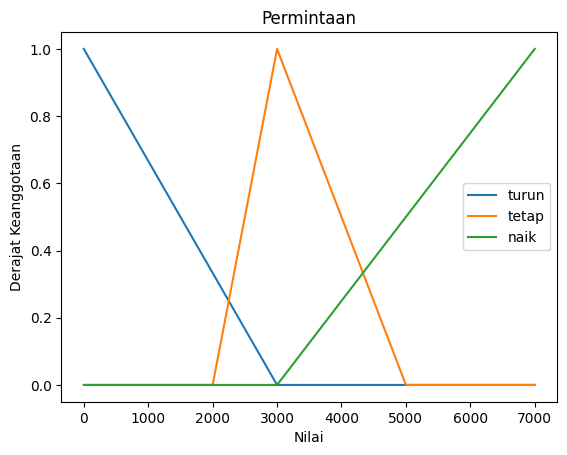

In [16]:
import matplotlib.pyplot as plt

x_permintaan = list(range(0, 7001, 100))
turun_permintaan = [turun(x, 0, 3000) for x in x_permintaan]
tetap_permintaan = [tetap(x, 2000, 3000, 5000) for x in x_permintaan]
naik_permintaan = [naik(x, 3000, 7000) for x in x_permintaan]


plt.plot(x_permintaan, turun_permintaan, label="turun")
plt.plot(x_permintaan, tetap_permintaan, label="tetap")
plt.plot(x_permintaan, naik_permintaan, label="naik")
plt.title("Permintaan")
plt.xlabel("Nilai")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()

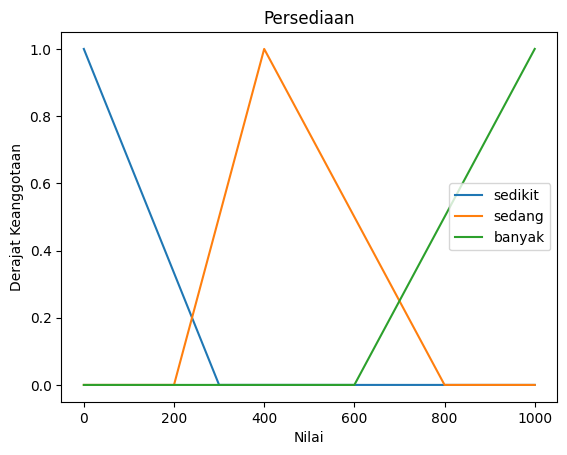

In [4]:
x_persediaan = list(range(0, 1001, 10))
sedikit_persediaan = [turun(x, 0, 300) for x in x_persediaan]
sedang_persediaan = [tetap(x, 200, 400, 800) for x in x_persediaan]
banyak_persediaan = [naik(x, 600, 1000) for x in x_persediaan]

plt.plot(x_persediaan, sedikit_persediaan, label="sedikit")
plt.plot(x_persediaan, sedang_persediaan, label="sedang")
plt.plot(x_persediaan, banyak_persediaan, label="banyak")
plt.title("Persediaan")
plt.xlabel("Nilai")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()

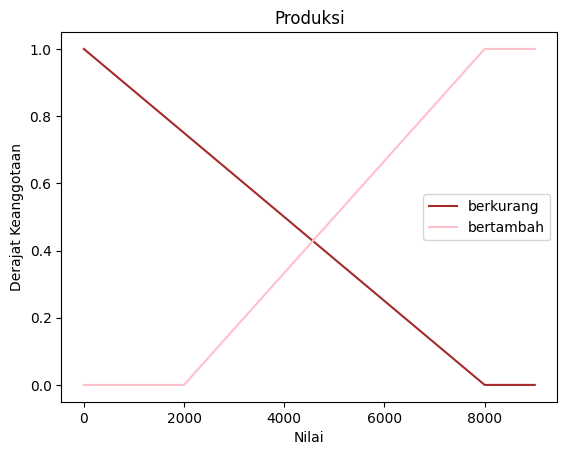

In [5]:
x_produksi = list(range(0, 9001, 100))
berkurang_produksi = [turun(x, 0, 8000) for x in x_produksi]
bertambah_produksi = [naik(x, 2000, 8000) for x in x_produksi]

plt.plot(x_produksi, berkurang_produksi, label="berkurang", color="brown")
plt.plot(x_produksi, bertambah_produksi, label="bertambah", color="pink")
plt.title("Produksi")
plt.xlabel("Nilai")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()

In [13]:
# Implementasi aturan fuzzy dengan metode Tsukamoto
def fuzzy_inference(permintaan, persediaan):
    # Derajat keanggotaan
    μ_turun = turun(permintaan, 0, 3000)
    μ_tetap = tetap(permintaan, 2000, 3000, 5000)
    μ_naik = naik(permintaan, 3000, 7000)

    μ_sedikit = turun(persediaan, 0, 300)
    μ_sedang = tetap(persediaan, 200, 400, 800)
    μ_banyak = naik(persediaan, 600, 1000)

    # Aturan fuzzy
    rules = [
        (min(μ_turun, μ_sedikit), "bertambah"),
        (min(μ_turun, μ_sedang), "berkurang"),
        (min(μ_turun, μ_banyak), "berkurang"),
        (min(μ_tetap, μ_sedikit), "bertambah"),
        (min(μ_tetap, μ_sedang), "berkurang"),
        (min(μ_tetap, μ_banyak), "berkurang"),
        (min(μ_naik, μ_sedikit), "bertambah"),
        (min(μ_naik, μ_sedang), "bertambah"),
        (min(μ_naik, μ_banyak), "berkurang")
    ]

    # Perhitungan produksi
    total_weight = 0
    total_value = 0
    for weight, result in rules:
        if result == "bertambah":
            value = 8000 * weight
        else:  # berkurang
            value = 2000 * weight
        total_weight += weight
        total_value += value

    return total_value / total_weight if total_weight != 0 else 0

In [14]:
permintaan_input = 4000  # Nilai permintaan
persediaan_input = 500   # Nilai persediaan

produksi_output = fuzzy_inference(permintaan_input, persediaan_input)

# Cetak hasil
print(f"Produksi Output: {produksi_output:.2f}")

Produksi Output: 4000.00


In [ ]:
Contoh Penghitungan Manual Logika Fuzzy

Langkah 1: Fuzzifikasi

Fuzzifikasi adalah proses mengubah nilai input menjadi derajat keanggotaan dalam himpunan fuzzy.

Fungsi Keanggotaan

Permintaan: Turun,Tetap,Naik
Persediaan: Sedikit,Banyak,

Contoh Input
Permintaan: 4000
Persediaan: 500

Perhitungan Derajat Keanggotaan

Permintaan:
Derajat keanggotaan himpunan turun adalah 0.

Derajat keanggotaan himpunan tetap adalah 0.5.

Derajat keanggotaan himpunan naik adalah 0.25.

Persediaan:
Derajat keanggotaan himpunan sedikit adalah 0.5.
Derajat keanggotaan himpunan banyak adalah 0.

